In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create card values
suits = ['S','C','H','D']
card_vals = ['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

hard_hands_index = np.arange(19)
hard_hands_values = np.arange(3,22)
hard_hand_vals_dict = {}
for i in range(len(hard_hands_index)): 
    hard_hand_vals_dict[hard_hands_index[i]] = hard_hands_values[i]
    
hard_hand_vals_dict_reverse = {}
for i in range(len(hard_hands_index)): 
    hard_hand_vals_dict_reverse[hard_hands_values[i]] = hard_hands_index[i]
    
soft_hands_index = np.arange(19)
soft_hands_values = np.arange(3,22)
soft_hand_vals_dict = {}
for i in range(len(soft_hands_index)): 
    soft_hand_vals_dict[soft_hands_index[i]] = soft_hands_values[i]
    
soft_hand_vals_dict_reverse = {}
for i in range(len(soft_hands_index)): 
    soft_hand_vals_dict_reverse[soft_hands_values[i]] = soft_hands_index[i]
    
dealer_hands_index = np.arange(10)
dealer_hands_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
dealer_hand_vals_dict = {}
for i in range(len(dealer_hands_index)):
    dealer_hand_vals_dict[dealer_hands_index[i]] = dealer_hands_values[i]
    
dealer_hand_vals_dict_reverse = {}
for i in range(len(dealer_hands_index)): 
    dealer_hand_vals_dict_reverse[dealer_hands_values[i]] = dealer_hands_index[i]
    
dealer_presentation = [2, 3, 4, 5, 6, 7, 8, 9, 10, 'A']

In [3]:
#create a dictionary and a numpy array holding all card values and all cards
cards = {}
for suit in suits:
    for i in range(len(card_vals)):
        card = str(card_vals[i])+suit
        cards[card] = n_values[i]
        
x = 0
card_id = {}
pack = []
for c in cards:
    card_id[x] = c
    pack.append([x, 0])
    x += 1
    
ace_flag = {}

for i in cards:
    if i[0] == 'A':
        ace_flag[i] = 1
    else: ace_flag[i] = 0
        
hand_types = {0:'hard',1:'soft'}

In [4]:
#Shuffle the cards
def shuffle_cards(pack):    
    shuffle_order = np.arange(52)
    np.random.shuffle(shuffle_order)

    shuffled_pack = np.copy(pack)
    for card in range(len(shuffled_pack)):
        shuffled_pack[card][1] = int(shuffle_order[card])

    return(shuffled_pack[shuffled_pack[:,1].argsort()])  

In [5]:
def get_hand_value(hand, cards, card_id):
    value = 0
    for i in hand:
        value += cards[card_id[i]]
        
    return(value)

def draw_card(hand, deck, next_card_to_deal):
    hand.append(deck[next_card_to_deal][0])
    next_card_to_deal += 1
    
    return(hand, next_card_to_deal)

In [6]:
def run_initial_game(pack, n, cards, card_id, ace_flag, hard_hands_values, soft_hands_values, dealer_hands_values):
        
    games = []
    
    hard_hands = hard_hands_values
    soft_hands = soft_hands_values
    dealer_hands = dealer_hands_values
    
    #Run hard hands
    for h in hard_hands:
        for d in dealer_hands: 
 
            for q in range(n):
                #deal first cards
                
                dealer = []
                player = []

                player_hand_value = h
                dealer_hand_value = d
            
                #Shuffle the cards
                deck = shuffle_cards(pack)
                
                player_game_record = []
                
                #define hand type
                player_hand = 0 #set to hard 
                dealer_hand = 0
                calculate_winner = 1
                ace_applied = 0
                

                #Deal 1 card to the player, then the dealer, then the player

                next_card_to_deal = 3 #defined the next card to be pulled
                dealer_must_turn = 1 #set a variable for forcing dealer turns
                bust = 1 #variable for if player bust
                dealer_bust = 1 #variable for dealer bust
                win = -1 #variable for win
                stop = 0 #flag for stopping

                #check if the hand is 21
                if player_hand_value == 21:
                    win = 1
                    player_game_record.append([player_hand, player_hand_value, dealer_hand_value, 0])
                    decision = 0
                    calculate_winner = 0
                    stop = 1

                #build decision engine
                if win == -1:
                    if q <= n/2:
                        decision = 0
                    else: decision = 1
                        
                if win == -1:
                    player_game_record.append([player_hand,player_hand_value, dealer_hand_value, decision])
                
                while decision == 1:

                    #player_game_record.append([player_hand,player_hand_value, dealer_hand_value, decision])
                    #if player draws a card
                    player, next_card_to_deal = draw_card(player, deck, next_card_to_deal)
                    player_hand_value = get_hand_value(player, cards, card_id)+h
                                        
                    #check to see if they have an ace
                    for i in player:
                        if ace_flag[card_id[i]] == 1:
                            player_hand = 1

                    #if an ace and can increase by 10 then do it
                    if player_hand == 1:
                        if player_hand_value + 10 < 22:
                            player_hand_value += 10
                            ace_applied = 1
                            
                                #check to make sure increasing the hand doesn't bust the hand
                    if player_hand == 1:
                        if player_hand_value > 21:
                            if ace_applied == 1:
                                if player_hand_value-10 < 22:
                                    player_hand_value = player_hand_value-10
                                    ace_applied = 0

                    if player_hand_value == 21:
                        win = 1
                        decision = 0
                        calculate_winner = 0
                        stop = 1
                    else:
                        if player_hand_value > 21:
                            win = 0
                            decision = 0
                            calculate_winner = 0
                            stop = 1
                        else: 
                            decision = np.random.choice(2)
                            
                    #player_game_record.append([player_hand,player_hand_value, dealer_hand_value, decision])
                    
                    
                if stop == 0:
                    #dealer turn engine
                    while dealer_must_turn == 1:
                        dealer, next_card_to_deal = draw_card(dealer, deck, next_card_to_deal)
                        dealer_hand_value = get_hand_value(dealer, cards, card_id)+d

                        #if dealer holds an ace treat as 11
                        for i in dealer:
                            if ace_flag[card_id[i]] == 1:
                                dealer_hand = 1
                                dealer_hand_value += 10      

                        if dealer_hand_value > 21:
                            win = 1
                            dealer_bust = 1
                            dealer_must_turn = 0
                            calculate_winner = 0

                        if dealer_hand_value > 17:
                            dealer_must_turn = 0
                                                       
                if calculate_winner == 1:
                    if player_hand_value > dealer_hand_value:
                        win = 1
                    else: win = 0
                                
                for i in player_game_record:
                    games.append([i[0], i[1], i[2], i[3], win])
                    
                    
                    
    #Run soft hands
    for s in soft_hands:
        for d in dealer_hands: 
                                                       
            for q in range(n):
                
                #deal first cards

                #Shuffle the cards
                deck = shuffle_cards(pack)
                
                decision = 0
                
                dealer = []
                player = []
                
                player_game_record = []
                
                #define hand type
                player_hand = 1 #set to soft
                dealer_hand = 1
                calculate_winner = 1
                stop = 0
                ace_applied = 0
                
                player_hand_value = s
                dealer_hand_value = d

                #Deal 1 card to the player, then the dealer, then the player

                next_card_to_deal = 3 #defined the next card to be pulled
                dealer_must_turn = 1 #set a variable for forcing dealer turns
                bust = 1 #variable for if player bust
                dealer_bust = 1 #variable for dealer bust
                win = -1 #variable for win

                if player_hand_value+10 < 22:
                    player_hand_value += 10
                    ace_applied = 1
                
                #check if the hand is 21
                if player_hand_value == 21:
                    win = 1
                    player_game_record.append([player_hand, player_hand_value, dealer_hand_value, 0])
                    decision = 0
                    calculate_winner = 0
                    stop = 1
                else:
                    if win == -1:
                        if q <= n/2:
                            decision = 0
                        else: decision = 1
                                                                            
                #player turn engine
                if win == -1:
                    player_game_record.append([player_hand,player_hand_value, dealer_hand_value, decision])

                while decision == 1:

                    #player_game_record.append([player_hand,player_hand_value, dealer_hand_value, decision])
                    #if player draws a card
                    player, next_card_to_deal = draw_card(player, deck, next_card_to_deal)
                    player_hand_value = get_hand_value(player, cards, card_id)+s

                    #if an ace and can increase by 10 then do it
                    if player_hand == 1:
                        if player_hand_value + 10 < 22:
                            player_hand_value += 10
                            ace_applied = 1

                    #check to make sure increasing the hand doesn't bust the hand
                    if player_hand == 1:
                        if player_hand_value > 21:
                            if ace_applied == 1:
                                if player_hand_value-10 < 22:
                                    player_hand_value = player_hand_value-10
                                    ace_applied = 0

                    if player_hand_value == 21:
                        win = 1
                        decision = 0
                        calculate_winner = 0
                        stop = 1
                    else:
                        if player_hand_value > 21:
                            win = 0
                            decision = 0
                            calculate_winner = 0
                            stop = 1
                        else: 
                            decision = np.random.choice(2)
                            
                    #player_game_record.append([player_hand,player_hand_value, dealer_hand_value, decision])

   
                if stop == 0:
                    #dealer turn engine
                    while dealer_must_turn == 1:
                        dealer, next_card_to_deal = draw_card(dealer, deck, next_card_to_deal)
                        dealer_hand_value = get_hand_value(dealer, cards, card_id)+d

                        #if dealer holds an ace treat as 11
                        for i in dealer:
                            if ace_flag[card_id[i]] == 1:
                                dealer_hand = 1
                                dealer_hand_value += 10      

                        if dealer_hand_value > 21:
                            win = 1
                            dealer_bust = 1
                            dealer_must_turn = 0
                            calculate_winner = 0
                            stop = 1

                        if dealer_hand_value > 17:
                            dealer_must_turn = 0
                            
                if calculate_winner == 1:
                    if player_hand_value > dealer_hand_value:
                        win = 1
                    else: win = 0

                for i in player_game_record:
                    games.append([i[0], i[1], i[2], i[3], win])

    games = np.array(games)

    return(games)

In [7]:
def run_normal_game(pack, n, cards, card_id, ace_flag, decision_matrix_hard, decision_matrix_soft, ran_games, hard_hand_vals_dict_reverse, 
                    soft_hand_vals_dict_reverse, dealer_hand_vals_dict_reverse):

    games = []

    for l in range(n):
        #deal first cards

        #Shuffle the cards
        deck = shuffle_cards(pack)
        player_game_record = []

        #Deal 1 card to the player, then the dealer, then the player

        dealer = [deck[1][0]]
        player = [deck[0][0], deck[2][0]]

        next_card_to_deal = 3 #defined the next card to be pulled
        dealer_must_turn = 1 #set a variable for forcing dealer turns
        bust = 1 #variable for if player bust
        dealer_bust = 1 #variable for dealer bust
        win = -1 #variable for win
        calculate_winner = 1
        stop = 0
        ace_applied = 0

        #define hand type
        player_hand = 0 #set to hard 
        dealer_hand = 0

        #if an ace is held, set to soft
        for i in player:
            if ace_flag[card_id[i]] == 1:
                player_hand = 1

        #if dealer holds an ace treat as 11
        for i in dealer:
            if ace_flag[card_id[i]] == 1:
                dealer_hand = 1

        player_hand_value = get_hand_value(player, cards, card_id)
        dealer_hand_value = get_hand_value(dealer, cards, card_id)

        #if an ace and can increase by 10 then do it
        if player_hand == 1:
            if player_hand_value + 10 < 22:
                player_hand_value += 10
                ace_applied = 1

        #if dealer has an ace, increase by 10
        if dealer_hand == 1:
            dealer_hand_value += 10

        #check if the hand is 21
        if player_hand_value == 21:
            win = 1
            player_game_record.append([player_hand, player_hand_value, dealer_hand_value, 0])
            decision = 0
            calculate_winner = 0
            stop = 1
        else:
            if stop == 0:
                if player_hand == 0:#denotes hard hand
                    decision = decision_matrix_hard[hard_hand_vals_dict_reverse[player_hand_value]][dealer_hand_vals_dict_reverse[dealer_hand_value]]
                else:
                    decision = decision_matrix_soft[soft_hand_vals_dict_reverse[player_hand_value]][dealer_hand_vals_dict_reverse[dealer_hand_value]]
                        
        if stop == 0:
            player_game_record.append([player_hand, player_hand_value, dealer_hand_value, decision])
                        

        while decision == 1:

            #if player draws a card
            player, next_card_to_deal = draw_card(player, deck, next_card_to_deal)
            player_hand_value = get_hand_value(player, cards, card_id)

            #check to see if they have an ace
            for i in player:
                if ace_flag[card_id[i]] == 1:
                    player_hand = 1

            #if an ace and can increase by 10 then do it
            if player_hand == 1:
                if player_hand_value + 10 < 22:
                    player_hand_value += 10
                    ace_applied = 1

            #check to make sure increasing the hand doesn't bust the hand
            if player_hand == 1:
                if player_hand_value > 21:
                    if ace_applied == 1:
                        if player_hand_value-10 < 22:
                            player_hand_value = player_hand_value-10
                            ace_applied = 0
                    
            if player_hand_value == 21:
                win = 1
                decision = 0
                calculate_winner = 0
                stop = 1
            else:
                if player_hand_value > 21:
                    win = 0
                    decision = 0
                    calculate_winner = 0
                    stop = 1
                else:
                    if stop == 0:
                        if player_hand == 0:#hard hand
                            decision = decision_matrix_hard[hard_hand_vals_dict_reverse[player_hand_value]][dealer_hand_vals_dict_reverse[dealer_hand_value]]
                        else:
                            decision = decision_matrix_soft[soft_hand_vals_dict_reverse[player_hand_value]][dealer_hand_vals_dict_reverse[dealer_hand_value]]
                        player_game_record.append([player_hand,player_hand_value, dealer_hand_value, decision])
                        
            

        if stop == 0:
            #dealer turn engine
            while dealer_must_turn == 1:
                dealer, next_card_to_deal = draw_card(dealer, deck, next_card_to_deal)
                dealer_hand_value = get_hand_value(dealer, cards, card_id)

                #if dealer holds an ace treat as 11
                for i in dealer:
                    if ace_flag[card_id[i]] == 1:
                        dealer_hand = 1
                        dealer_hand_value += 10      

                if dealer_hand_value > 21:
                    win = 1
                    dealer_bust = 1
                    dealer_must_turn = 0
                    calculate_winner = 0
                    stop = 1
                
                if dealer_hand_value > 17:
                    dealer_must_turn = 0
                    
                    
        if calculate_winner == 1:
            if player_hand_value >= dealer_hand_value:
                win = 1
            else: win = 0    
            
        for i in player_game_record:
            games.append([i[0], i[1], i[2], i[3], win])

    games = np.array(games)
        
    z = np.concatenate((ran_games, games))
    z = np.array(z)
    
    return(z)

In [8]:
def analyse_games(games, threshold, decision_matrix_hard, decision_matrix_soft, decision_matrix_hard_value, decision_matrix_soft_value,
                  hard_index, soft_index, dealer_index, hard_hand_vals_dict, soft_hand_vals_dict, dealer_hand_vals_dict):
    
    #Seperate out each game array
    hard_games = games[games[:,0] == 0]
    soft_games = games[games[:,0] == 1]


    if type(decision_matrix_hard) == int:
        decision_matrix_hard = np.zeros((len(hard_index), len(dealer_index)))
    else: decision_matrix_hard = decision_matrix_hard
        
    if type(decision_matrix_soft) == int:
        decision_matrix_soft = np.zeros((len(soft_index), len(dealer_index)))
    else: decision_matrix_soft = decision_matrix_soft
        
    if type(decision_matrix_hard_value) == int:    
        decision_matrix_hard_value = np.zeros((len(hard_index), len(dealer_index)))
    else: decision_matrix_hard_value = decision_matrix_hard_value
        
    if type(decision_matrix_soft_value) == int:    
        decision_matrix_soft_value = np.zeros((len(hard_index), len(dealer_index)))
    else: decision_matrix_soft_value = decision_matrix_soft_value
    
    hard_game_data = []

    for h in hard_index:
        for d in dealer_index:
            hh = hard_hand_vals_dict[h]
            dd = dealer_hand_vals_dict[d]
            
            
            r = [hh, dd, 0, 0, 0, 0, 0, 0, 0]
            hard_game_data.append(r)

    hard_game_data = np.array(hard_game_data)

    soft_game_data = []

    for s in soft_index:
        for d in dealer_index:
            ss = soft_hand_vals_dict[s]
            dd = dealer_hand_vals_dict[d]
            
            r = [ss, dd, 0, 0, 0, 0, 0, 0, 0]
            soft_game_data.append(r)

    soft_game_data = np.array(soft_game_data)
    game_cols =  ['player', 'dealer', 'games_played', 'games pulled', 'games_pulled_won', 'games_not_pulled', 'games_not_pulled_won']
    
    #Generate decision matrix for hard game

    for h in hard_index:
        
        hh = hard_hand_vals_dict[h]
        
        p = hard_games[hard_games[:,1] == hh]
        for d in dealer_index: 
            
            dd = dealer_hand_vals_dict[d]

            pull_win_perc = -1
            no_pull_win_perc = -1

            pd = p[p[:,2] == dd]
            row_id = np.where((hard_game_data[:,0] == hh) & (hard_game_data[:,1] == dd))[0][0]
            pd_pull = pd[pd[:,3] == 1]
            pd_nopull = pd[pd[:,3] == 0]
            games_played = len(pd)
            games_pulled = len(pd_pull)
            games_nopull = len(pd_nopull)
            games_pullwin = len(pd_pull[pd_pull[:,-1] == 1])
            games_nopullwin = len(pd_nopull[pd_nopull[:,-1] == 1])

            hard_game_data[row_id][2] = hard_game_data[row_id][2]+games_played
            hard_game_data[row_id][3] = hard_game_data[row_id][3]+games_pulled
            hard_game_data[row_id][4] = hard_game_data[row_id][4]+games_pullwin
            hard_game_data[row_id][5] = hard_game_data[row_id][5]+games_nopull
            hard_game_data[row_id][6] = hard_game_data[row_id][6]+games_nopullwin

            wins = games_pullwin + games_nopullwin
            
            if games_played > 0:
                score = wins/games_played
            else: score = 0
        
            if score > threshold: #if my win percentage is above 48% then stick with the card
                action = 0
            else: action = 1 #if its below 48% change the hand
                
            #check to see if the action is the same
            if action == decision_matrix_hard[h][d]:
                action_same = 1
            else: action_same = 0
                
            #check to see if the value has gone up or down
            
            if decision_matrix_hard_value[h][d] > score:
                #if my win percentage has got worse
                if decision_matrix_hard[h][d] == 0:
                    action = 1
                else:
                    action = 0
            else:
                #if my win percentage has improved
                #check to see if the action is the same
                if action_same == 1:
                    #if it is the same, do nothing
                    action = action
                else:
                    #if it wan't to change, keep it the same because it improved
                    action = decision_matrix_hard[h][d]         

            decision_matrix_hard[h][d] = action
            decision_matrix_hard_value[h][d] = score
                        
            #Generate decision matrix for hard game

    for s in soft_index:
        
        ss = soft_hand_vals_dict[s]
        
        p = soft_games[soft_games[:,1] == ss]
        for d in dealer_index:              
            
            dd = dealer_hand_vals_dict[d]
            
            pull_win_perc = -1
            no_pull_win_perc = -1

            pd = p[p[:,2] == dd]
            row_id = np.where((soft_game_data[:,0] == ss) & (soft_game_data[:,1] == dd))[0][0]
            pd_pull = pd[pd[:,3] == 1]
            pd_nopull = pd[pd[:,3] == 0]
            games_played = len(pd)
            games_pulled = len(pd_pull)
            games_nopull = len(pd_nopull)
            games_pullwin = len(pd_pull[pd_pull[:,-1] == 1])
            games_nopullwin = len(pd_nopull[pd_nopull[:,-1] == 1])

            soft_game_data[row_id][2] = soft_game_data[row_id][2]+games_played
            soft_game_data[row_id][3] = soft_game_data[row_id][3]+games_pulled
            soft_game_data[row_id][4] = soft_game_data[row_id][4]+games_pullwin
            soft_game_data[row_id][5] = soft_game_data[row_id][5]+games_nopull
            soft_game_data[row_id][6] = soft_game_data[row_id][6]+games_nopullwin
            
            wins = games_pullwin + games_nopullwin
        
            if games_played > 0:
                score = wins/games_played
            else: score = 0
        
            if score > threshold: #if my win percentage is above 48% then stick with the card
                action = 0
            else: action = 1 #if its below 48% change the hand
                
            #check to see if the action is the same
            if action == decision_matrix_soft[s][d]:
                action_same = 1
            else: action_same = 0
                
            #check to see if the value has gone up or down
            
            if decision_matrix_soft_value[s][d] > score:
                #if my win percentage has got worse, change the action to the opposite of what it currently does
                if decision_matrix_soft[s][d] == 0:
                    action = 1
                else:
                    action = 0
            else:
                #if my win percentage has improved
                #check to see if the action is the same
                if action_same == 1:
                    #if it is the same, do nothing
                    action = action
                else:
                    #if it wan't to change, keep it the same because it improved
                    action = decision_matrix_soft[s][d]         
                

            decision_matrix_soft[s][d] = action  
            decision_matrix_soft_value[s][d] = score
            
            
    return(decision_matrix_hard, decision_matrix_soft, decision_matrix_hard_value, decision_matrix_soft_value)

# Strategy Creation

starting data gather complete


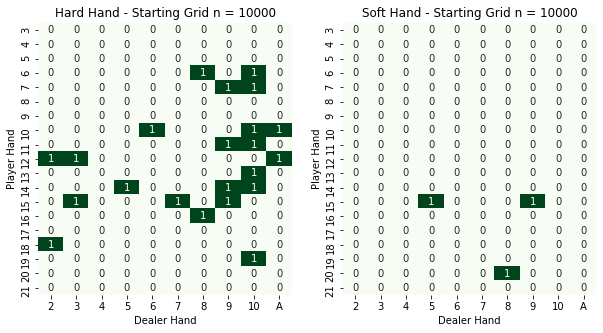

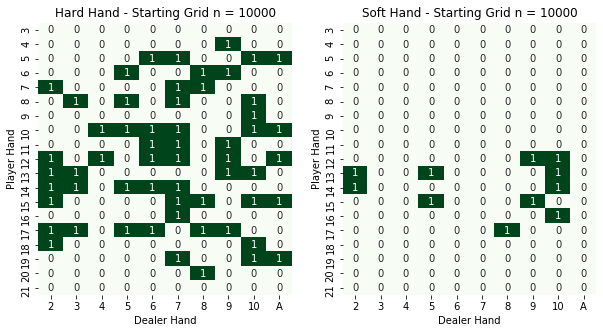

Starting Games 19000
Total Games 19568


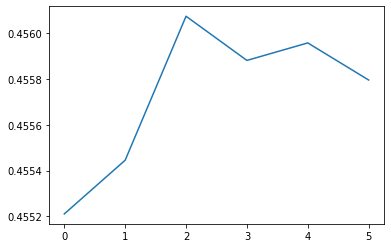

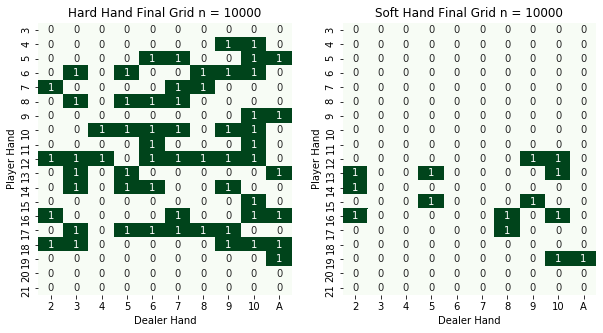

In [12]:
performance_stat = []

#Generate starting data
runs_per_start_hand = 50
data = run_initial_game(pack, runs_per_start_hand, cards, card_id, ace_flag, hard_hands_values, soft_hands_values, dealer_hands_values)
dm_h, dm_s, dm_h_value, dm_s_value = analyse_games(data, 0.48, 0, 0, 0,0, hard_hands_index, soft_hands_index, 
                                                   dealer_hands_index, hard_hand_vals_dict, soft_hand_vals_dict, dealer_hand_vals_dict)

start_data = data.copy()
starting_games_played = len(start_data)
performance_stat.append(np.sum(start_data[:,4])/len(start_data))
print('starting data gather complete')

#Configure Settings
runs_per_sweep = 100
total_sweeps = 5
graph_prints = [0,3]

for sweep in range(total_sweeps):
    data = run_normal_game(pack, runs_per_sweep, cards, card_id, ace_flag, dm_h, dm_s, data, hard_hand_vals_dict_reverse, 
                    soft_hand_vals_dict_reverse, dealer_hand_vals_dict_reverse)
    dm_h, dm_s, dm_h_value, dm_s_value = analyse_games(data, 0.48, dm_h, dm_s, dm_h_value, dm_s_value, hard_hands_index, soft_hands_index, dealer_hands_index, hard_hand_vals_dict, soft_hand_vals_dict, dealer_hand_vals_dict )
    if sweep in graph_prints:
        ht = 'Hard Hand - Starting Grid n = 10000'
        st = 'Soft Hand - Starting Grid n = 10000'
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        sns.heatmap(dm_h, xticklabels=True, yticklabels=True, cmap='Greens', ax=ax1, cbar=False, annot=True)
        ax1.set_xticklabels(dealer_presentation)
        ax1.set_yticklabels(hard_hands_values)
        ax1.set(xlabel='Dealer Hand', ylabel='Player Hand')
        
        ax1.title.set_text(ht)
        sns.heatmap(dm_s, xticklabels=True, yticklabels=True, cmap='Greens', ax=ax2, cbar=False, annot=True)
        ax2.set_xticklabels(dealer_presentation)
        ax2.set_yticklabels(soft_hands_values)
        ax2.set(xlabel='Dealer Hand', ylabel='Player Hand')
        ax2.title.set_text(st)
        plt.show()
        
    performance_stat.append(np.sum(data[:,4])/len(data))
    
total_games_played = len(data)

#print('Starting Games', starting_games_played)
#print('Total Games', total_games_played)

plt.plot(np.array(performance_stat))
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.heatmap(dm_h, xticklabels=True, yticklabels=True, cmap='Greens', ax=ax1, cbar=False, annot=True)
ax1.set_xticklabels(dealer_presentation)
ax1.set_yticklabels(hard_hands_values)
ax1.set(xlabel='Dealer Hand', ylabel='Player Hand')
ax1.title.set_text('Hard Hand Final Grid n = 10000')
sns.heatmap(dm_s, xticklabels=True, yticklabels=True, cmap='Greens', ax=ax2, cbar=False, annot=True)
ax2.set_xticklabels(dealer_presentation)
ax2.set_yticklabels(soft_hands_values)
ax2.set(xlabel='Dealer Hand', ylabel='Player Hand')
ax2.title.set_text('Soft Hand Final Grid n = 10000')
plt.show()


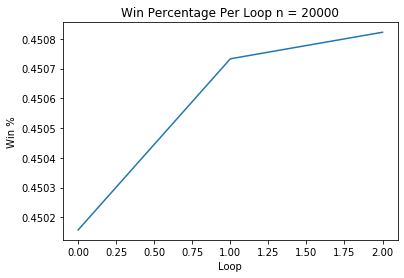

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(np.array(performance_stat))
plt.xlabel('Loop')
plt.ylabel('Win %')
plt.title('Win Percentage Per Loop n = 20000')
#plt.yticks(np.arange(min(performance_stat), max(performance_stat)+0.005, .003))
plt.show()

In [18]:
dm_h

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
ff = open("dm_soft_hand.txt", "w")
for row in dm_s:
    np.savetxt(ff, row)

ff.close()

In [10]:
#cols = ['gametype','player','dealer','choice','win']

#a = pd.DataFrame(data, columns=cols)
#a.to_csv('output2.csv', index=False)